In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")
import string
from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, average_precision_score, precision_recall_curve, plot_precision_recall_curve, f1_score
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional, Dense, LSTM, SimpleRNN, Conv1D,MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
import random
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
from tensorflow.keras.models import Sequential
from fastai.text import *

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv') 
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [ ]:
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
from fastai.text import *
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5) 
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.318018,3.939437,0.277202,00:09


In [ ]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(8896, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(8896, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=8896, bias=True)
    (output_dp): RNNDropout()
  )
)

In [ ]:
learn.save_encoder('encoder')

In [ ]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = data, valid_df = data_test, vocab=data_lm.train_ds.vocab, bs=32)
clas_model = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
clas_model.fit_one_cycle(5,6.31E-07,moms=(0.8,0.7))
clas_model.load_encoder('encoder')
train_tf = x_train.apply(lambda row:str(clas_model.predict(row)[0]))

precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = x_test.apply(lambda row:str(clas_model.predict(row)[0]))
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

RNNLearner(data=TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos xxmaj only the chosen ones will appreciate the quality of the story and character design of this movie . xxmaj superior xxunk that dwell in the lands of xxunk far beyond any average human creature 's understanding . xxmaj this movie pulls the adventure genre into a unique xxunk magical force of fantasy xxunk thee mystical xxunk of chalice . xxmaj stories come and go , but the idea for a good story is to think positive , not negative thoughts . xxmaj to create a good versus evil battle like never before . xxmaj embracing an xxunk shimmering process that keeps imagination glowing in one dimension and out the other . xxmaj striking a quick flash of energy that xxunk a human to another world .,xxbos i 'm so confused . i 've been a huge xxmaj seagal fan for 25 years . i 've seen all of his films , and many of those dozens of times . i can only describe this film as " bizarre . " xxmaj steven xxmaj seagal shar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.09E-02


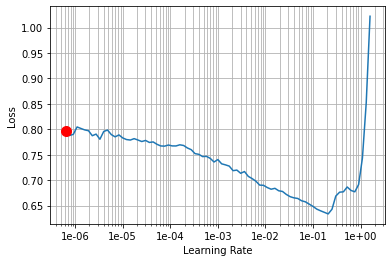

In [ ]:
clas_model.lr_find()
clas_model.recorder.plot(show_grid=True, suggestion=True)

In [ ]:
 learn.predict("This was a great movie!")

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/딥러닝/과제/data.csv")
data.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [ ]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
  
# nltk.download('stopwords')
# stopwords = set(stopwords.words('english'))
# stopwords.update(["br","href"])

txt = []    
for sent in tqdm(data['Comment'].values):  
    sent = re.sub(r"http\S+", "", sent)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = decontracted(sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    sent = " ".join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    txt.append(sent.strip())

100%|██████████| 3947/3947 [00:00<00:00, 4207.03it/s]


In [ ]:
data.drop("Comment",axis=1,inplace=True)
data['CleanText'] = txt
data.reset_index(inplace=False)
data[["Insult","CleanText"]].head(4)

,Insult,CleanText
0,1,fuck dad
1,0,really understand seems mixing apples oranges
2,0,canadians wrong n nunless supportive idea noth...
3,0,listen dont wanna get married man women dont w...


In [ ]:
data.drop("Date",axis=1,inplace=True)

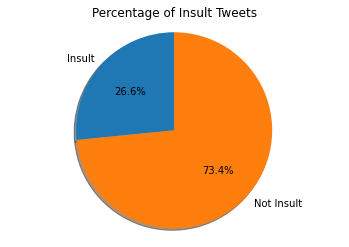

In [ ]:
labels = 'Insult', 'Not Insult'
sizes = [len(np.where(data['Insult']==1)[0]), len(np.where(data['Insult']==0)[0])]
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Percentage of Insult Tweets')
plt.show()

In [ ]:
max_words=10000
maxlen=100
token=Tokenizer(num_words=max_words)
token.fit_on_texts(data['CleanText'].values)
sequence=token.texts_to_sequences(data['CleanText'].values)
word_index=token.word_index
print(len(word_index))
labels=data['Insult'].values
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

14400
(3947, 100)
(3947,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=42)

In [ ]:
glove_dir='/content/drive/MyDrive/딥러닝/딥러닝실습데이터/glove.6B'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8')
for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=seq
f.close

<function TextIOWrapper.close>

In [ ]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Bidirectional(LSTM(64),merge_mode='concat'))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               84480     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,084,609
Trainable params: 1,084,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
22/22 [==============================] - 5s 68ms/step - loss: 0.5980 - auc: 0.5230 - val_loss: 0.606

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Bidirectional(LSTM(64),merge_mode='concat'))
model_gl.add(Dropout(0.1))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]

model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
gl_result = model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,084,609
Trainable params: 1,084,609
Non-trainable params: 0
____________________________________________

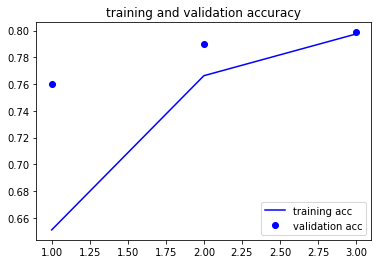

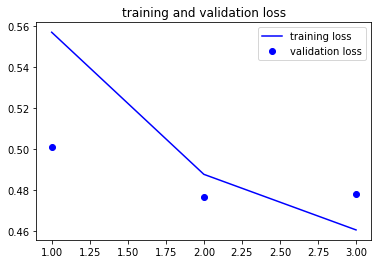

In [ ]:
import matplotlib.pyplot as plt
acc=gl_result.history['auc']
val_acc=gl_result.history['val_auc']
loss=gl_result.history['loss']
val_loss=gl_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['CleanText'].values)
word_id=tokenizer.word_index
seq=tokenizer.texts_to_sequences(data['CleanText'].values)

In [ ]:
max_words=10000
maxlen=100
token=Tokenizer(num_words=max_words)
token.fit_on_texts(data['CleanText'].values)
sequence=token.texts_to_sequences(data['CleanText'].values)
word_index=token.word_index
print(len(word_index))
labels=data['Insult'].values
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

In [ ]:
!pip install Faker

     |████████████████████████████████| 1.2MB 12.2MB/s 


In [ ]:
from faker import Faker
fake = Faker()

In [ ]:
swear = pd.read_csv("/content/drive/MyDrive/딥러닝/과제/list.txt")

In [ ]:
swear = swear['4r5e'].values

In [ ]:
tmp = list()
tmp.append('a')
tmp.append('b')
print(tmp)

['a', 'b']


In [ ]:
good = list()
bad = list()

for _ in range(5000):
  txt = fake.text()
  good.append(txt)

for _ in range(5000,10000):
  temp = fake.text()
  txt = temp.replace(random.choice(temp.split()),random.choice(swear))
  bad.append(txt)

bad[:2]

['Task process think sing pussy your. Candidate dinner point. Concern others onto author chair little score.\nAlthough court short.',
 'Really nothing firm. Sort market wife toward.\nEnvironmental win edge high involve add.\nChallenge fuckme  we produce. Later else win everyone. Manage kind be hard which.']

In [ ]:
len(bad)

5000

In [ ]:
len(good)

5000

In [ ]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase 
  
# nltk.download('stopwords')
stopwords.update(["br","href"])

In [ ]:
txt = []    
for sent in tqdm(good):  
    sent = re.sub(r"http\S+", "", sent)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = decontracted(sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    sent = " ".join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    txt.append(sent.strip())

txt2 = []    
for sent in tqdm(bad):  
    sent = re.sub(r"http\S+", "", sent)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = decontracted(sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    sent = " ".join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    txt2.append(sent.strip())

100%|██████████| 5000/5000 [00:01<00:00, 2845.72it/s]


In [ ]:
gooddf = pd.DataFrame({'Insult':np.repeat(0,5000),'Text':txt})
baddf = pd.DataFrame({'Insult':np.repeat(1,5000),'Text':txt2})

In [ ]:
transfer = pd.concat([gooddf, baddf])
transfer.head()

,Insult,Text
0,0,environment tend mr democratic rock degree ten...
1,0,whose seem major attorney sport question class...
2,0,watch land often economy though foot list give...
3,0,prove water positive production back wife list...
4,0,bill approach entire old inside hour increase ...


In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['CleanText'].values)
word_id=tokenizer.word_index
seq=tokenizer.texts_to_sequences(data['CleanText'].values)

In [ ]:
seq2=tokenizer.texts_to_sequences(transfer.Text.values)

In [ ]:
seq2 = sequence.pad_sequences(seq2, maxlen=10000)

In [ ]:
X_train, X_test = train_test_split(seq2,test_size=0.3,random_state=42)
y_train, y_test = train_test_split(transfer.Insult.values,test_size=0.3,random_state=42)

In [ ]:
max_features = 10000

In [ ]:
X_train=sequence.pad_sequences(X_train,maxlen=100)
X_test=sequence.pad_sequences(X_test,maxlen=100)
m_f=Sequential()
m_f.add(Embedding(max_features, 32))
m_f.add(Bidirectional(LSTM(32),merge_mode='concat'))
m_f.add(Dense(1, activation='sigmoid'))
m_f.summary()
m_f.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
m_f.fit(X_train,y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
55/55 [==============================] - 122s 2s/step - loss: 0.6929 - acc: 0.5070 - val_loss: 0.6908 - val_acc: 0.5443
Epoch 2/10
55/55 [==============================] - 117s 2s/step - loss: 0.6729 - acc: 0.6226 - val_loss: 0.6663 - val_acc: 0.6053
Epoch 3/10
55/55 [==============================] - 117s 2s/step - loss: 0.6434 - acc: 0.6747 - val_loss: 0.6520 - v

In [ ]:
X_train=sequence.pad_sequences(X_train,maxlen=10000)
X_test=sequence.pad_sequences(X_test,maxlen=10000)
m_bd=Sequential()
m_bd.add(Embedding(max_features, 32))
m_bd.add(Bidirectional(LSTM(32),merge_mode='concat'))
m_bd.add(Dense(1, activation='sigmoid'))
m_bd.summary()
m_bd.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
m_bd.fit(X_train,y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 64)                16640     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
55/55 [==============================] - 121s 2s/step - loss: 0.6933 - acc: 0.4967 - val_loss: 0.6934 - val_acc: 0.4910
Epoch 2/10
55/55 [==============================] - 116s 2s/step - loss: 0.6863 - acc: 0.5607 - val_loss: 0.6906 - val_acc: 0.5267
Epoch 3/10
55/55 [==============================] - 116s 2s/step - loss: 0.6680 - acc: 0.6039 - val_loss: 0.6877 - 

In [ ]:
m_bd.save('/content/drive/MyDrive/딥러닝/과제/m_bd.h5')

In [ ]:
seq = sequence.pad_sequences(seq, maxlen=10000) 

In [ ]:
new_x = m_bd.predict(seq)
new_y = data['Insult'].values
x_train_tf,x_test_tf,y_train_tf,y_test_tf =train_test_split(new_x, new_y, test_size=0.3,random_state=42) 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(seq, data['Insult'].values, test_size=0.3,random_state=42)

In [ ]:
m_bd2=Sequential()
m_bd2.add(Embedding(max_features,32))
m_bd2.add(Bidirectional(SimpleRNN(32),merge_mode='concat'))
m_bd2.add(Dense(1, activation='sigmoid'))
m_bd2.summary()
m_bd2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
m_bd2.fit(x_train,y_train, epochs=5,batch_size=64)
simple_test = (m_bd2.predict_proba(x_test) >= 0.5).astype(bool)

precision, recall, thresholds = precision_recall_curve(y_test, simple_test)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,simple_test, average="micro"),5),'         /' ,
      round(f1_score(y_test,simple_test, average="macro"),5),'  /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,simple_test),5))

In [ ]:
m_bd2=Sequential()
m_bd2.add(m_bd)
m_bd2.add(Embedding(max_features,64))
m_bd2.add(Dropout(0.2))
m_bd2.add(Bidirectional(SimpleRNN(64),merge_mode='concat'))
m_bd2.add(Dense(1, activation='sigmoid'))
m_bd2.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]
m_bd2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_27 (Sequential)   (None, 1)                 336705    
_________________________________________________________________
embedding_29 (Embedding)     (None, 1, 64)             640000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 993,346
Trainable params: 993,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m_bd2.fit(x_train,y_train, epochs=5,batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)
simple_test_tf = (m_bd2.predict_proba(x_test) >= 0.5).astype(bool)

precision, recall, thresholds = precision_recall_curve(y_test_tf, simple_test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test_tf,simple_test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test_tf,simple_test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test_tf,simple_test_tf),5))

Epoch 1/5
22/22 [==============================] - 28s 1s/step - loss: 0.5930 - auc: 0.5023 - val_loss: 0.5820 - val_auc: 0.5000
Epoch 2/5
22/22 [==============================] - 23s 1s/step - loss: 0.5789 - auc: 0.5060 - val_loss: 0.5812 - val_auc: 0.5000
Epoch 3/5
22/22 [==============================] - 23s 1s/step - loss: 0.5802 - auc: 0.4792 - val_loss: 0.5827 - val_auc: 0.5000
Test:
 F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC 
 0.73249         / 0.4228    / 0.63376     / 0.5


In [ ]:
m_bd2=Sequential()
m_bd2.add(Embedding(max_features,64))
m_bd2.add(Dropout(0.2))
m_bd2.add(Bidirectional(LSTM(64),merge_mode='concat'))
m_bd2.add(Dense(1, activation='sigmoid'))
m_bd2.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]
m_bd2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
m_bd2.fit(x_train_tf,y_train_tf, epochs=5,batch_size=128, validation_data=(x_test_tf, y_test_tf), callbacks=callback_list)
simple_test_tf = (m_bd2.predict_proba(x_test_tf) >= 0.5).astype(bool)

precision, recall, thresholds = precision_recall_curve(y_test_tf, simple_test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test_tf,simple_test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test_tf,simple_test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test_tf,simple_test_tf),5))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 64)          640000    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
22/22 [==============================] - 6s 57ms/step - loss: 0.6293 - auc: 0.5140 - val_loss: 0.5843 - val_auc: 0.5000
Epoch 2/5
22/22 [==============================] - 0s 11ms/step - loss: 0.5796 - auc: 0.4993 - val_loss: 0.5810 - v

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Dropout(0.2))
model_gl.add(Conv1D(64,7,activation='relu')) 
model_gl.add(MaxPooling1D(5))
model_gl.add(Conv1D(64,7,activation='relu'))
model_gl.add(GlobalMaxPooling1D())
model_gl.add(Dropout(0.2))
model_gl.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]

model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
gl_result = model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 64)            44864     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 12, 64)            28736     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)              

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Bidirectional(SimpleRNN(64),merge_mode='concat'))
model_gl.add(Dropout(0.1))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]

model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
gl_result = model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               21120     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,021,249
Trainable params: 1,021,249
Non-trainable params: 0
___________________________________________

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Bidirectional(GRU(64),merge_mode='concat'))
model_gl.add(Dropout(0.1))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]

model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
gl_result = model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               63744     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,063,873
Trainable params: 1,063,873
Non-trainable params: 0
___________________________________________

In [ ]:
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Dropout(0.2))
model_gl.add(Conv1D(32,7,activation='relu'))
model_gl.add(MaxPooling1D(5))
model_gl.add(Conv1D(32,7,activation='relu'))
model_gl.add(GlobalMaxPooling1D())
model_gl.add(Dense(1, activation='sigmoid'))
model_gl.summary()
callback_list=[EarlyStopping(monitor='val_auc', patience=2)]

model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['AUC'])
gl_result = model_gl.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), callbacks=callback_list)

train_tf = model_gl.predict_classes(x_train)
precision, recall, thresholds = precision_recall_curve(y_train, train_tf)
auc_precision_recall = auc(recall, precision)
print("Train:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_train,train_tf, average="micro"),5),'        /' ,
      round(f1_score(y_train,train_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_train,train_tf),5))

test_tf = model_gl.predict_classes(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, test_tf)
auc_precision_recall = auc(recall, precision)
print("Test:\n","F1 score(micro) / F1 score(macro) / PR-AUC / ROC-AUC \n",round(f1_score(y_test,test_tf, average="micro"),5),'        /' ,
      round(f1_score(y_test,test_tf, average="macro"),5),'   /' ,
      round(auc_precision_recall,5), '    /' ,round(roc_auc_score(y_test,test_tf),5))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 94, 32)            22432     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)               